<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter10SamplingStrategy/ShutterEffects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rolling and Global Shutter
## David Brady
## University of Arizona
## November 2023

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant
plt.rcParams['figure.figsize'] = (10, 10) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.size']=24

Image sensors read data according in row and column format. Time constants associated with the data stream include the frame period, the row readout time, the reset time and the exposure time. The frame period, the readout time and the reset time are characteristics of the sensor, the exposure time is adjusted to the light source.

Here we compare simple sampling strategies for 32 spatial pixels and 8 frames of temporal data.

We assume that the rolling shutter shifts by 1/32 of a frame time in to read each row. This means that there are $32^2$ time steps in the exposure process.

With interlaced rolling shutter, the $17^{th}$ row is read after the first, then the $3^{rd}$, then the $18^{th}$ ...

### exposure time is half the frame period

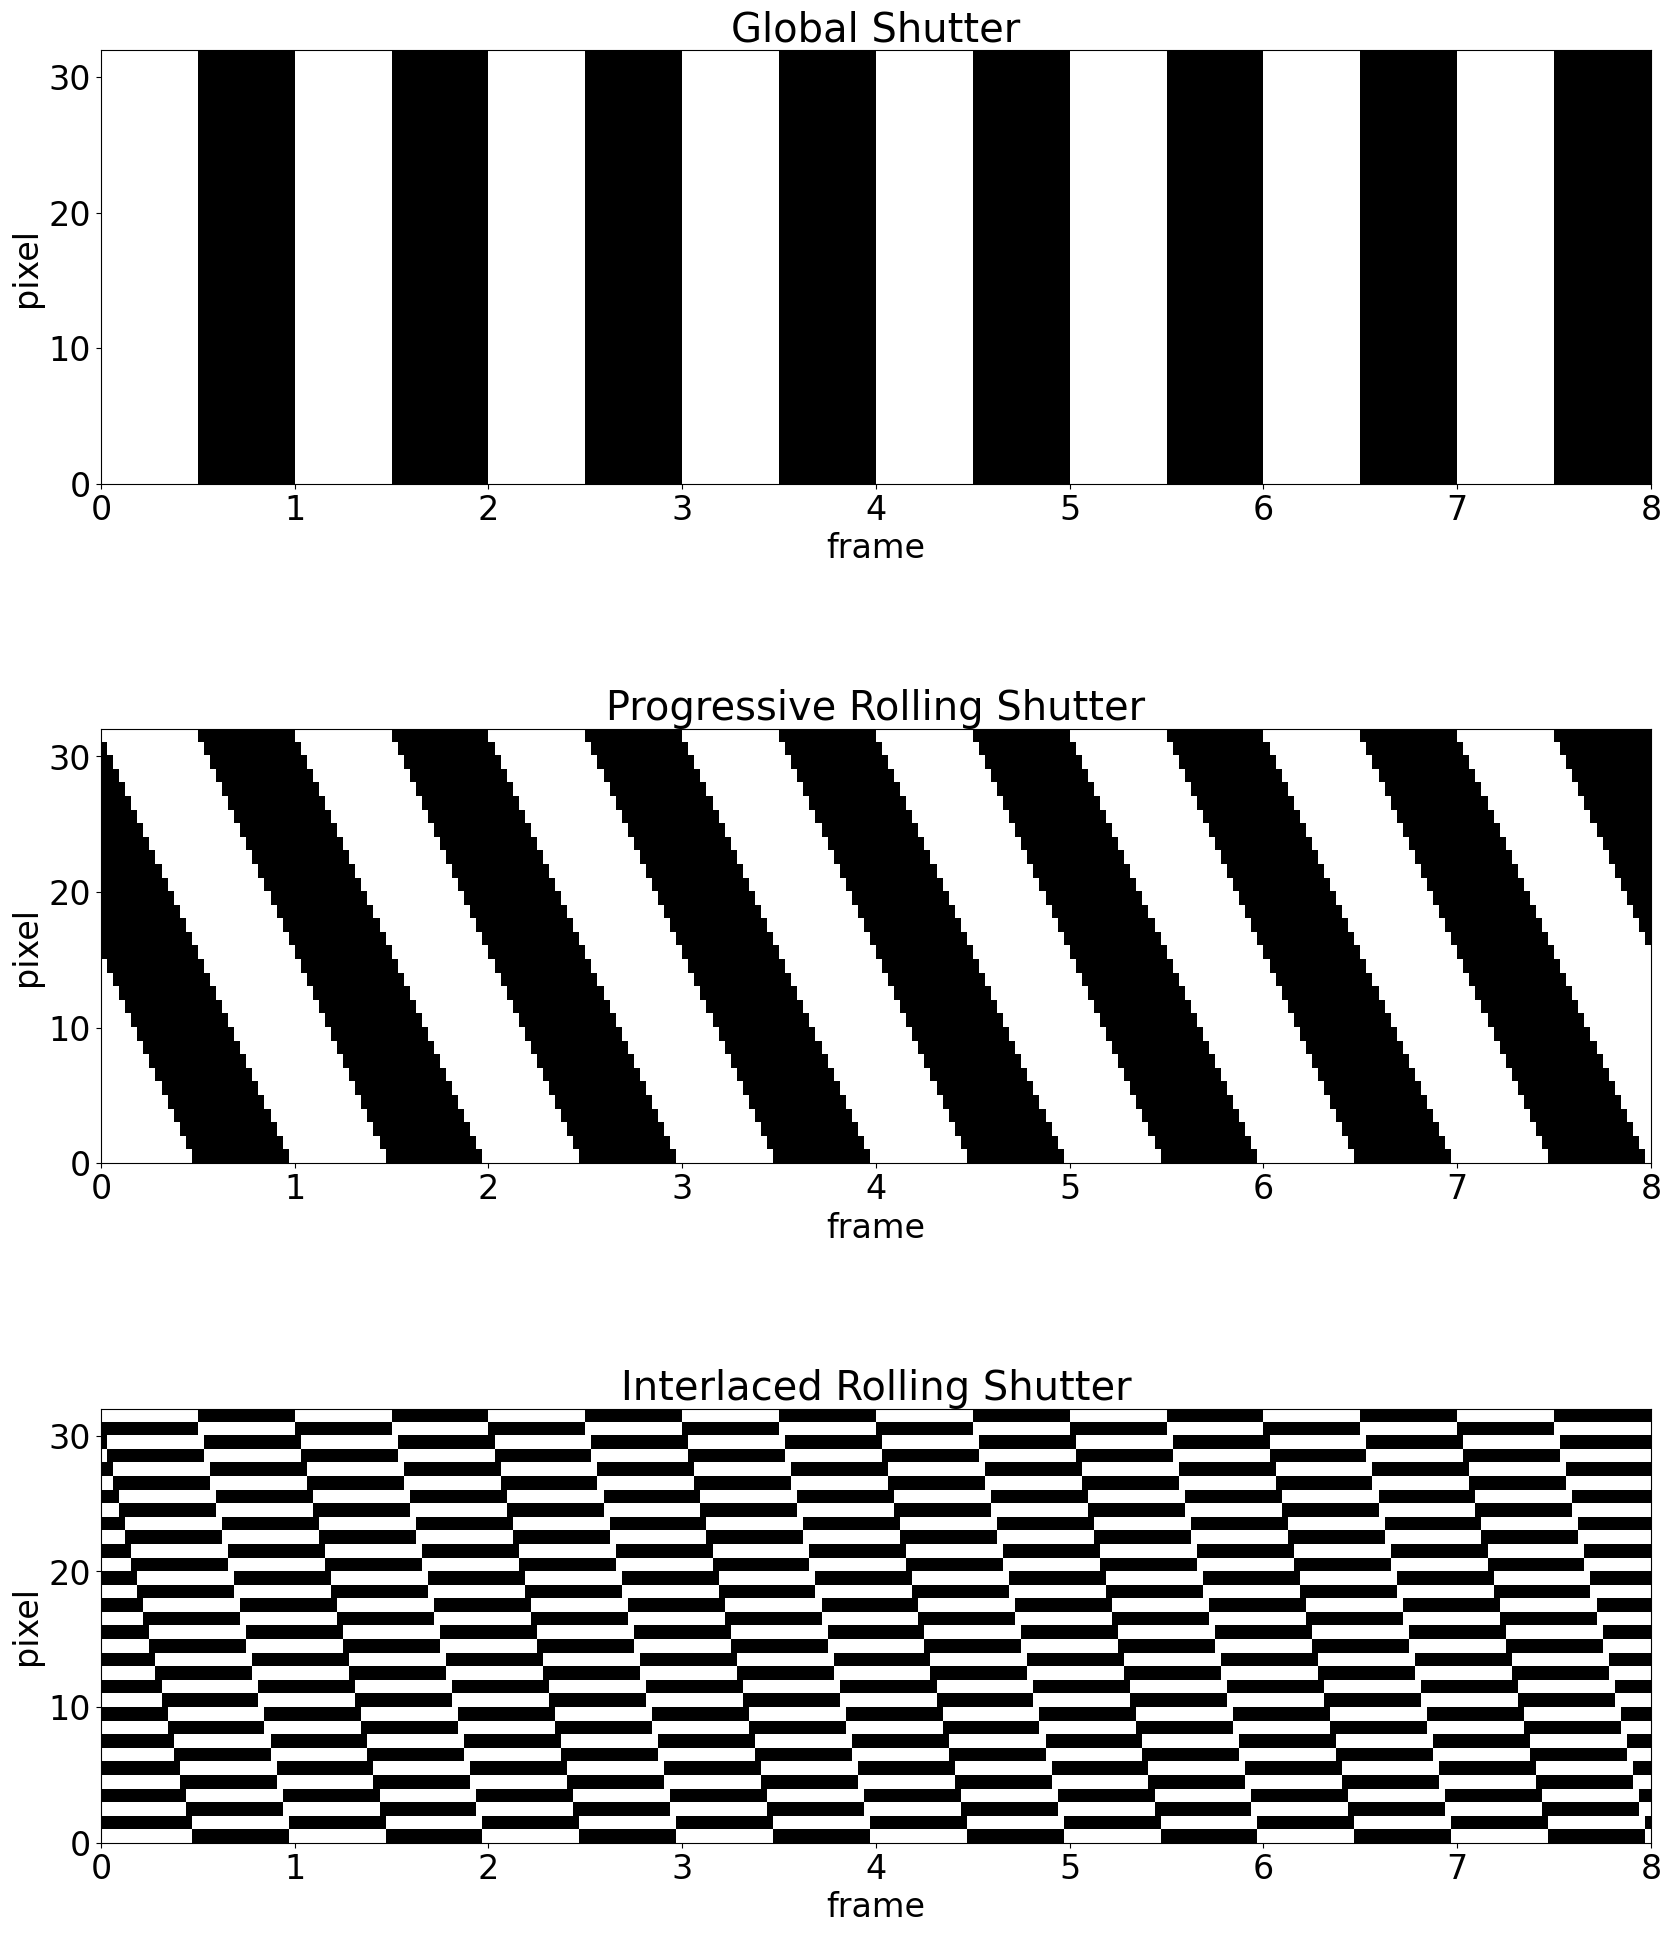

In [4]:
plt.figure(figsize=(20,25))
gs=np.zeros((32,32))
gs[:,0:16]=np.ones((32,16))
rs=np.transpose(circulant(np.hstack((np.ones(16),np.zeros(16)))))
irs=np.zeros((32,32))
irs[::2,:]=rs[0:16,:]
irs[1::2,:]=rs[16:32,:]
for pip in range(3):
  gs=np.hstack((gs,gs))
  rs=np.hstack((rs,rs))
  irs=np.hstack((irs,irs))
plt.subplot(3,1,1)
plt.imshow(gs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.title('Global Shutter')
plt.subplot(3,1,2)
plt.imshow(rs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.title('Progressive Rolling Shutter')
plt.subplot(3,1,3)
plt.imshow(irs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.title('Interlaced Rolling Shutter')
plt.savefig('shutterPatterns.png')

In the above figures, white corresponds to data measurement, black means the corresponding pixel is not making measurements.

## Measurements and display for a simple random scene

### Exposure time is 1/32 of the frame period

example 1D spatial temporal scene

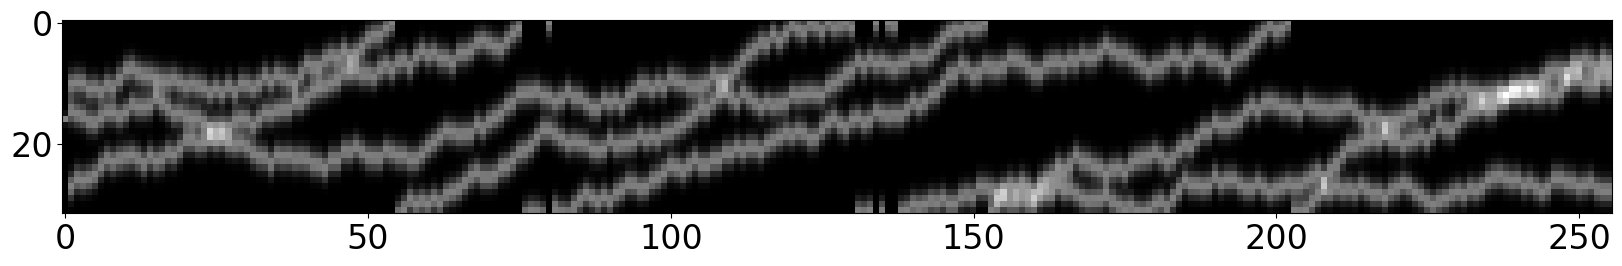

In [5]:
plt.figure(figsize=(20,25))
row=np.zeros(rs.shape)
spot=16
row[:,0]=np.exp(-(np.arange(32)-spot)**2/.5)
for pip in range(1,256):
  spot=spot-2.5*np.random.rand()+1
  row[:,pip]=np.exp(-(np.arange(32)-np.mod(spot,32))**2/4)
for pip in range(1,256):
  spot=spot-2.5*np.random.rand()+1
  row[:,pip]=row[:,pip]+np.exp(-(np.arange(32)-np.mod(spot,32))**2/4)
for pip in range(1,256):
  spot=spot-2.5*np.random.rand()+1
  row[:,pip]=row[:,pip]+np.exp(-(np.arange(32)-np.mod(spot,32))**2/4)
plt.imshow(row)


The problem with rolling shutter estimation is that the measured data is mistakenly represented as being captured in simulantously rather than interpolated to get the correct time sequence. These simple plots compare the sampled data correctly shown at the measurement time vs the sample data shifted to seem simultaneous.

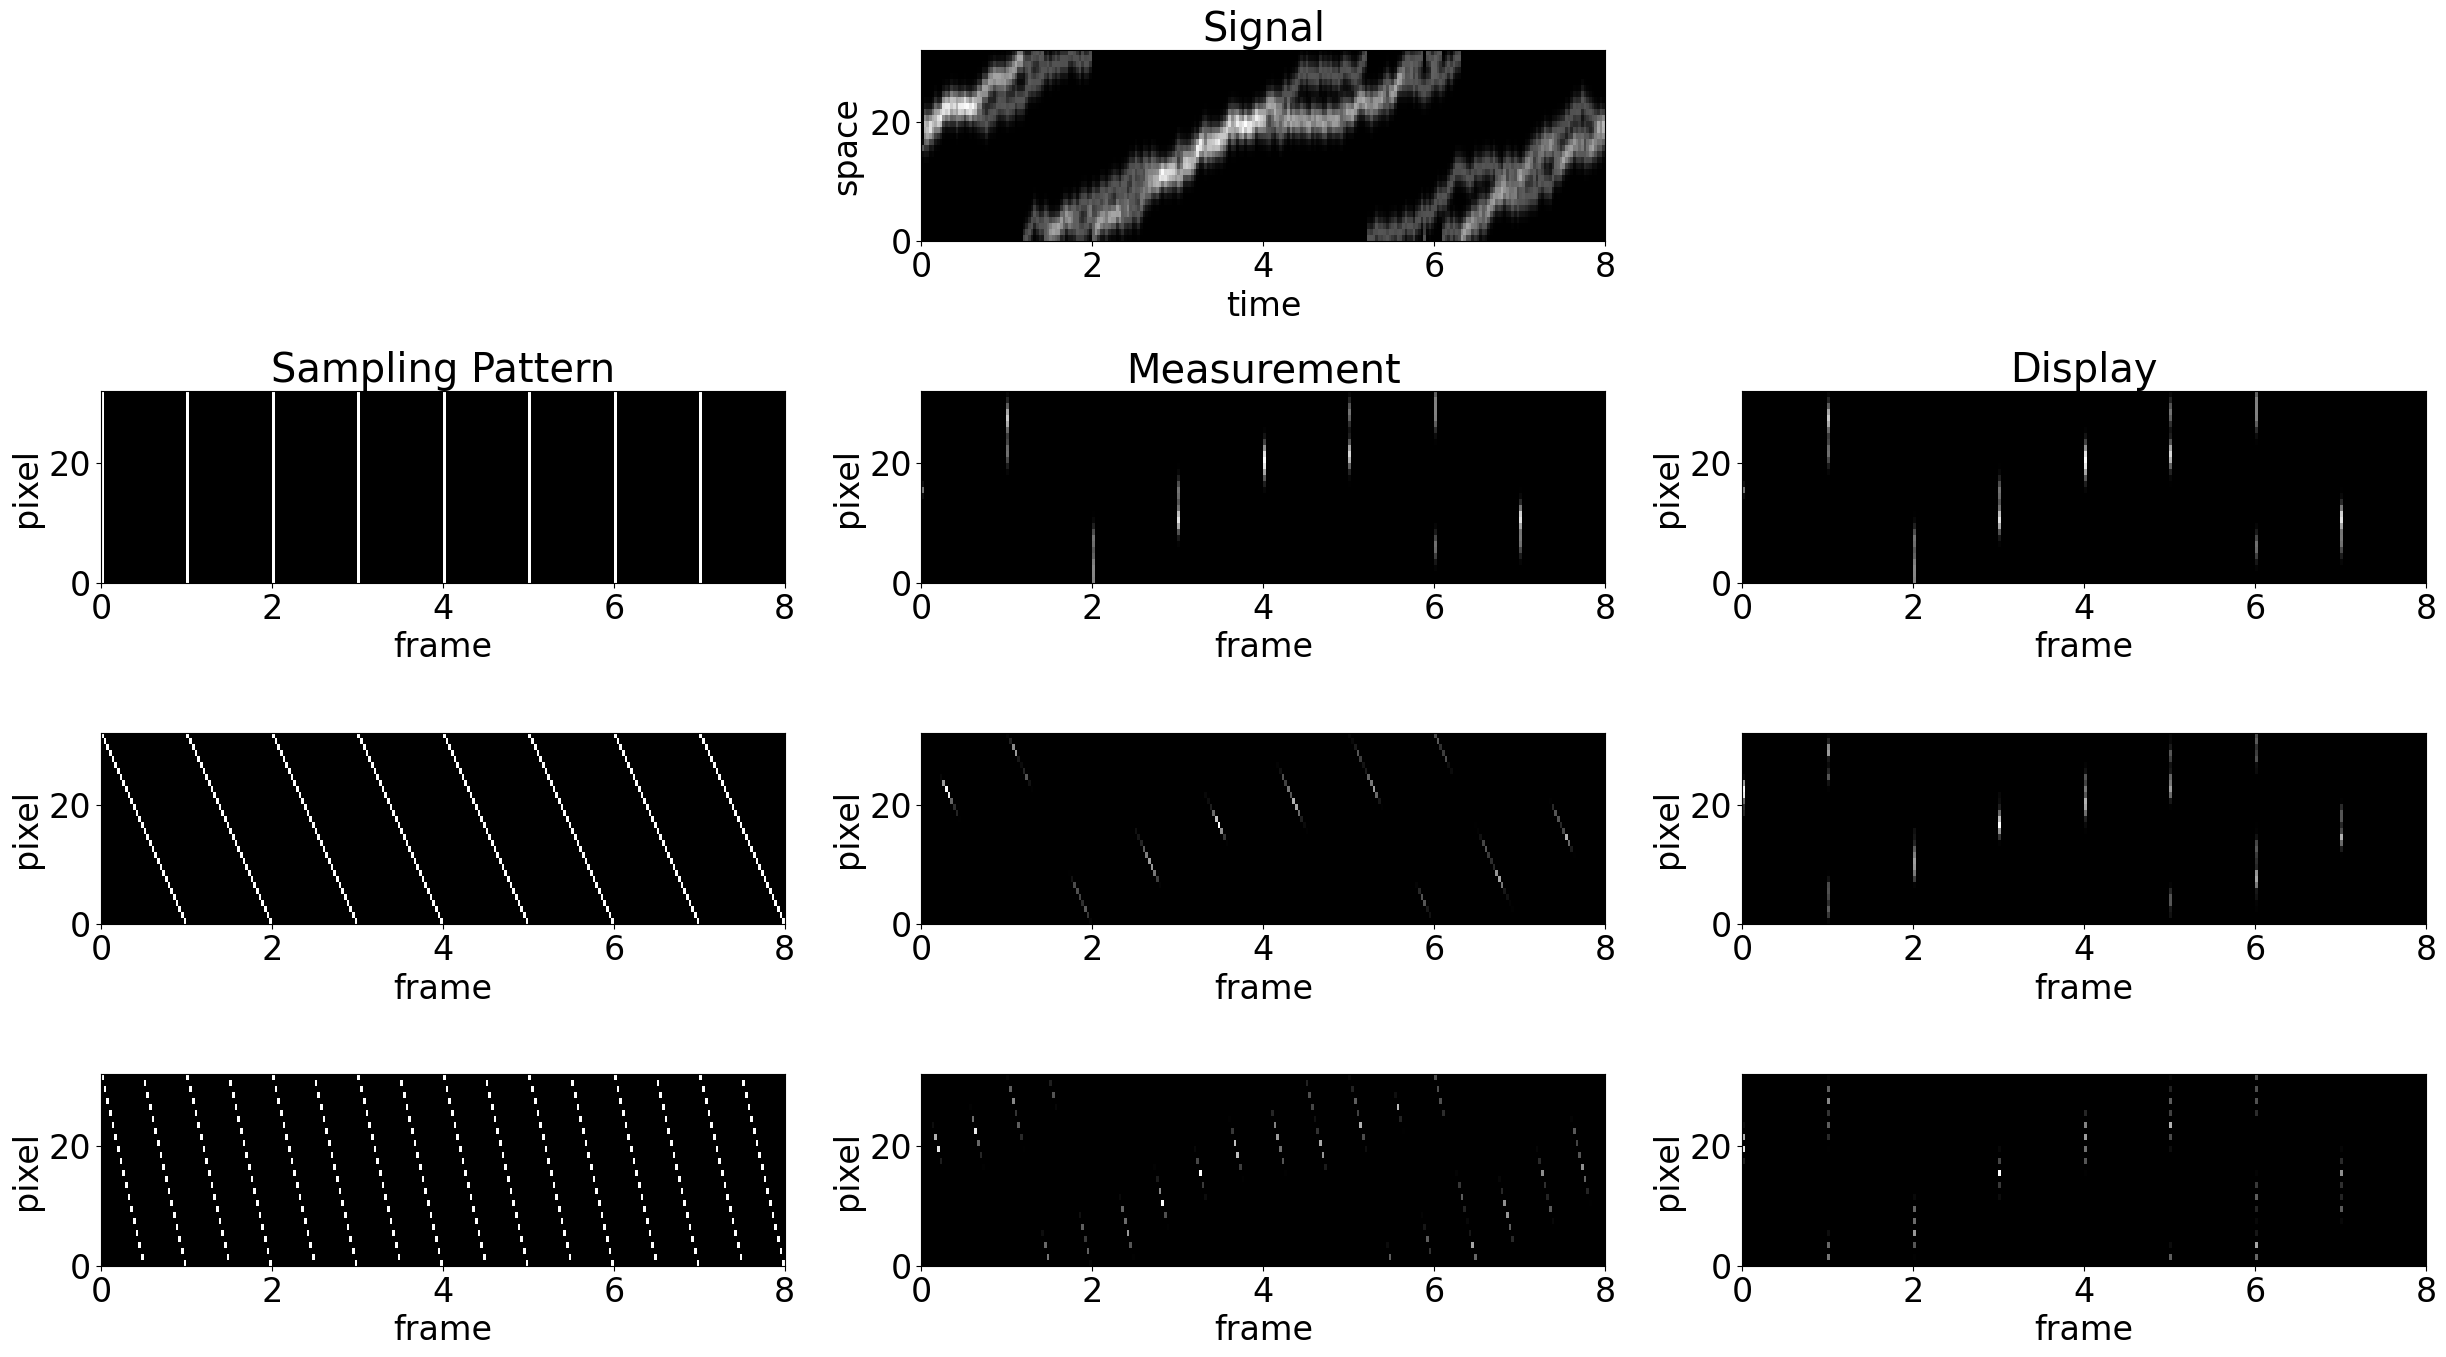

In [ ]:
plt.figure(figsize=(30,17))
gs=np.zeros((32,32))
gs[:,0:1]=np.ones((32,1))
rs=np.transpose(circulant(np.hstack((np.ones(1),np.zeros(31)))))
irs=np.zeros((32,32))
irs[::2,:]=rs[0:16,:]
irs[1::2,:]=rs[16:32,:]
for pip in range(3):
  gs=np.hstack((gs,gs))
  rs=np.hstack((rs,rs))
  irs=np.hstack((irs,irs))
plt.subplot(4,3,2)
plt.imshow(row, aspect=.07, extent=[0,8,0,32])
plt.xlabel('time')
plt.ylabel('space')
plt.title('Signal')
plt.subplot(4,3,4)
plt.imshow(gs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.title('Sampling Pattern')
plt.subplot(4,3,5)
plt.imshow(row*gs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.title('Measurement')
plt.subplot(4,3,6)
plt.imshow(row*gs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.title('Display')
plt.subplot(4,3,7)
plt.imshow(rs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.subplot(4,3,8)
plt.imshow(row*rs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
rrs=row*rs
for pop in range(32):
  rrs[pop,:]=np.roll(rrs[pop,:],-pop)
plt.subplot(4,3,9)
plt.imshow(rrs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.subplot(4,3,10)
plt.imshow(irs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.subplot(4,3,11)
plt.imshow(row*irs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.subplot(4,3,12)
rirs=row*irs
rirs[1::2,:]=0
for pop in range(16):
  rirs[2*pop,:]=np.roll(rirs[2*pop,:],-pop)
  rirs[2*pop+1,:]=np.roll(rirs[2*pop+1,:],-(pop+16))
plt.imshow(rirs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.savefig('shutterDisplay.png')

## interlaced vs random sampling

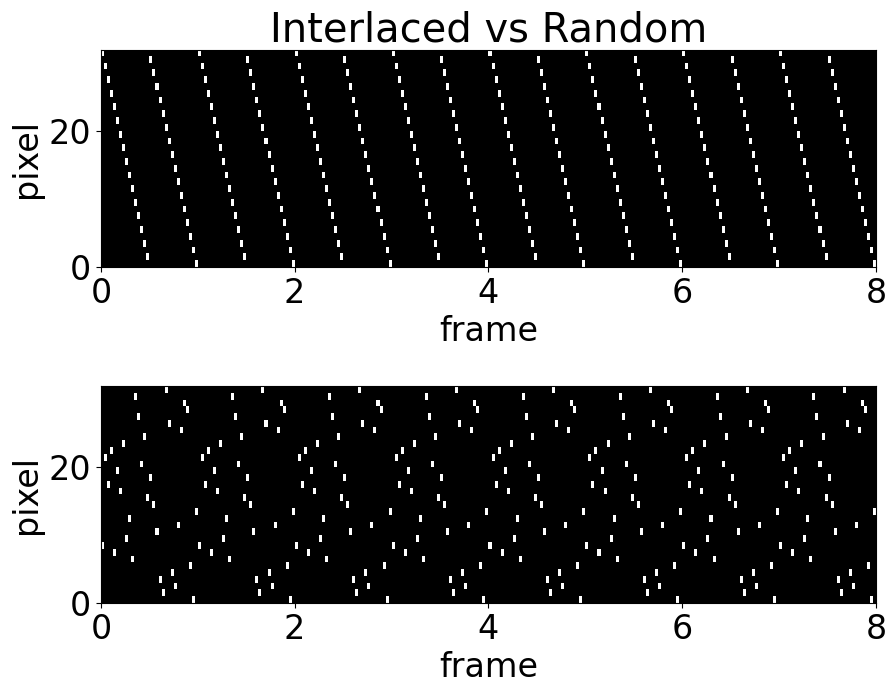

In [6]:
rs=np.transpose(circulant(np.hstack((np.ones(1),np.zeros(31)))))
irs=np.zeros((32,32))
irs[::2,:]=rs[0:16,:]
irs[1::2,:]=rs[16:32,:]
rrs=rs[np.random.permutation(range(32)),:]
for pip in range(3):
  irs=np.hstack((irs,irs))
  rrs=np.hstack((rrs,rrs))
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.imshow(irs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.title('Interlaced vs Random')
plt.subplot(2,1,2)
plt.imshow(rrs, cmap='gray', aspect=.07, extent=[0,8,0,32])
plt.xlabel('frame')
plt.ylabel('pixel')
plt.savefig('interlacedVsRandom.png')

